In [1]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
print(os.getcwd())

/home/user/Downloads/sem2/mtp_prish/Louvain_mixmod


In [2]:
p = []
alpha = []
labels = []
def getpval(line):
    filename = line[0]
    values = filename.split('_')
    return values[2]

def getlabel(line):
    filename = line[0]
    values = filename.split('_')
    return str(values[1])+'_'+str(values[2])


In [3]:
def get_percentage_inc(oldval,newval):
    return (oldval-newval)*100/oldval

In [15]:
def plot_gap(filename):
    resultsmixmod = open(filename)
    diff_sum=0.0
    norm = 0
    title = "Gap plot correctImplementation"
    gt_mod = []
    dt_mod = []
    resultsmixmod.readline()
    for line in resultsmixmod:
        line = line.split()
        gt_mod.append(float(line[1]))
        dt_mod.append(float(line[2]))
    gt_mod = np.array(gt_mod)
    dt_mod = np.array(dt_mod)
    gt_mean = np.mean(gt_mod)
    dt_mean = np.mean(dt_mod)
    gt_max = np.max(gt_mod)
    dt_max = np.max(dt_mod)
    
    for i in range(0, len(gt_mod)):
        gt_mod[i] = (gt_mod[i]*1.0)*1.0/gt_mean
        dt_mod[i] = (dt_mod[i]*1.0)*1.0/dt_mean
        
    toplot=[]
    for i in range(0, len(gt_mod)):
        cur_diff = gt_mod[i] - dt_mod[i]
        
        if cur_diff >0:
            diff_sum = diff_sum + cur_diff
            toplot.append(cur_diff)
        #else:
        #    diff_sum = diff_sum - cur_diff
        #    toplot.append(-1.0*cur_diff)
            
    x = range(0, len(toplot))
    #plt.figure(figsize = (15,15))
    plt.plot(x, toplot, label = 'Gap')
    plt.legend(loc = 'lower right')
    plt.title(title)
    plt.ylim([0.0, 1.0])
    plt.xticks(x, labels, rotation='vertical')
    plt.savefig(resultsfiledir+title+'.png')
    plt.show()        
    return (diff_sum*1.0)/len(gt_mod)
    

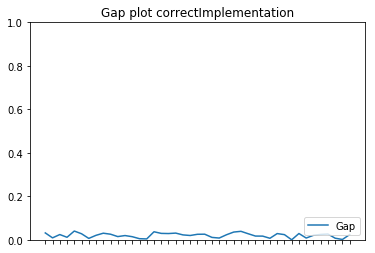

('Average gap: ', 0.012633536532337892)


In [16]:
resultsfiledir = './resultsmixmod/modularity_comparisions/'
resultsfilename = 'modComparisionMixModLouvain_wt_correctedImplementation_doinganything'
avg_gap4 = plot_gap(resultsfiledir+resultsfilename)
print("Average gap: ",avg_gap4)